
# **Aprendizado de máquina aplicado na caracterização de lesões de substância branca do Lúpus Eritematoso Sistêmico**

---


Nome: Leonardo Rodrigues da Costa


RA: 146895

Especialização: Física


---

# Introdução
   O Lúpus Eritematoso Sistêmico (LES ou em inglês Systemic Lupus Erythematosus, SLE) é uma doença crônica autoimune que pode afetar diversos órgãos e sistemas do corpo humano. No cérebro, sabe-se que esta condição pode causar lesões desmielinizantes na substância branca, observadas como manchas claras no tecido nervoso com o exame de ressonância magnética imagética (RMI). A proposta deste trabalho foi avaliar se as lesões do LES se assemelham mais às lesões da Esclerose Múltipla (EM, outra síndrome desmielinizante) ou do Acidente Vascular Cerebral (AVC) isquêmico (decorrente da obstrução de um vaso sanguíneo), os dois tipos de lesão também se apresentam como manchas claras na RMI. Para esta avaliação, utilizamos dois datasets (um com imagens RMI de pacientes com AVC, outro de pacientes com EM) para treino e validação de um classificador SVM (Support Vector Machine) linear. Subsequentemente, este classificador foi aplicado no dataset de imagens de LES. É importante dizer que as lesões nestas imagens foram previamente demarcadas por médicos, e cada imagem selecionada aqui acompanha uma máscara com sua região de interesse.
 
  O SVM calcula qual é o hiperplano que melhor separa as classes (no caso se é uma imagem de AVC ou EM) usando um vetor de atributos das imagens do conjunto de treino. Este vetor de atributos é construído com propriedades numéricas da imagem, como as estatísticas da distribuição de intensidade de cinza da imagem (ou apenas da máscara) ou de propriedades de textura (que definem relações, ou padrões, que os pontos de uma determinada vizinhança formam). 
   




  

#Ferramentas 
O código foi escrito em Python, em um notebook do Google Colab.
As principais bibliotecas utilizadas foram:




*   Google Drive
*   numpy
*   pandas
*   sklearn
*   matlibplot 

Demais bibliotecas foram declaradas na seção de inicialização do código.





### Inicializando o código

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# connect drive
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from os import listdir
from os.path import isfile, join

from skimage.feature import greycomatrix, greycoprops

!pip install glrlm

from glrlm import GLRLM
import cv2

from skimage.feature import local_binary_pattern
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm 

from random import randint
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Fazendo listas das figuras e suas máscaras em cada diretório

Os dados de treinamento/validação foram importados de duas pastas ('\AVC' e '\EM) do Google drive, as imagens de RMI estavam em dois formatos diferentes '.bmp' e '.png'
as imagens das máscaras estavam no formato '.png'. Foram 581 pares imagem-máscara de AVC e 630 de EM (225 para o teste da atividade A11), além de 697 de SLE  para classificação ao fim.

In [ ]:

def create_files_list(figures_path, add_zero = True):
  onlyfiles = [f for f in listdir(figures_path) if isfile(join(figures_path, f))]

  lista_mask = []
  lista_base = []

  a_lista = []
  b_lista = []

  for i in onlyfiles:
    if 'mask' in i:
      lista_mask.append(i)
      a_lista.append(i.replace('_mask.png', '.bmp'))
      b_lista.append(i.replace('_mask.png', '.png'))

  if add_zero == True:
    for i in range(len(a_lista)):
      if len(a_lista[i]) == 14:
        a_lista[i] = a_lista[i][0:9] + '0' + a_lista[i][9:]

    for i in range(len(b_lista)):
      if len(b_lista[i]) == 14:
        b_lista[i] = b_lista[i][0:9] + '0' + b_lista[i][9:]
    
  for i in a_lista:
    if i in onlyfiles:
      lista_base.append(i)

  for i in b_lista:
    if i in onlyfiles:
      lista_base.append(i)


  print(lista_mask)
  print(lista_base)
  print(len(lista_mask))
  print(len(lista_base))
  print(len(set(lista_mask)))
  print(len(set(lista_base)))
  print('\n')


  
  return sorted(lista_base), sorted(lista_mask)


In [ ]:
figures_path1 = '/content/gdrive/MyDrive/Train/AVC/'
figures_path2 = '/content/gdrive/MyDrive/Train/EM/'
figures_path3 = '/content/gdrive/MyDrive/Test/'


lista_avc, lista_mask_avc = create_files_list(figures_path1)
lista_em, lista_mask_em = create_files_list(figures_path2)
lista_test, lista_mask_test = create_files_list(figures_path3)

['006_FLAIR22_mask.png', '006_FLAIR23_mask.png', '006_FLAIR24_mask.png', '007_FLAIR11_mask.png', '007_FLAIR12_mask.png', '007_FLAIR13_mask.png', '007_FLAIR14_mask.png', '007_FLAIR15_mask.png', '007_FLAIR16_mask.png', '007_FLAIR17_mask.png', '007_FLAIR18_mask.png', '007_FLAIR19_mask.png', '007_FLAIR20_mask.png', '007_FLAIR21_mask.png', '007_FLAIR22_mask.png', '007_FLAIR23_mask.png', '007_FLAIR24_mask.png', '007_FLAIR4_mask.png', '007_FLAIR5_mask.png', '007_FLAIR6_mask.png', '008_FLAIR16_mask.png', '008_FLAIR4_mask.png', '008_FLAIR5_mask.png', '008_FLAIR6_mask.png', '008_FLAIR7_mask.png', '008_FLAIR8_mask.png', '009_FLAIR13_mask.png', '009_FLAIR14_mask.png', '009_FLAIR15_mask.png', '009_FLAIR19_mask.png', '009_FLAIR20_mask.png', '009_FLAIR21_mask.png', '009_FLAIR22_mask.png', '009_FLAIR23_mask.png', '009_FLAIR24_mask.png', '009_FLAIR25_mask.png', '010_FLAIR10_mask.png', '010_FLAIR11_mask.png', '010_FLAIR12_mask.png', '010_FLAIR13_mask.png', '010_FLAIR14_mask.png', '010_FLAIR15_mask.png',

#  Preparo e uso de dados

## Normalização 
A normalização das imagens foi feita usando o método MinMax que mapeia a menor valor da imagem para 0 e o maior valor para 255.


## Montando o vetor de atributos
  O vetor de atributos deste projeto foi feito a com as métricas (média, desvio padrão, obliquidade, curtose, tamanho da máscara/255, argmax) de três tipos de histograma:
 
 
1.   Histograma da imagem completa;
2.   Histograma da região da máscara;
3.   Histograma de textura Local Binary Pattern (LBP) da região da máscara.

Além disso levei em consideração o a numeração de cada imagem, considerando que imagens de fatias com a mesma numeração poderiam representar regiões similares, ou ao menos próximas, entre os pacientes.

### Estatísticas do Histograma

In [ ]:
def histstat(f, h, bins):
       
    hn = 1.0*h/h.sum()
    stats = np.zeros(7)
    
    ### compute statistics ###
    
    n = len(h) # number of gray values
    stats[0] = np.sum(bins*hn)                                                     # media
    stats[1] = np.sqrt(np.sum(np.power((bins - stats[0]),2)*hn))                   # std
    stats[2] = np.sum(np.power((bins - stats[0]),3)*hn)/(np.power(stats[1],1.5))   # obliquidade
    stats[3] = np.sum(np.power((bins - stats[0]),4)*hn)/(np.power(stats[1],2))-3   # curtose
  
    ## extra attributes ##
    
    stats[4] = -1*(hn*np.log10(hn+np.spacing(1))).sum() 
    stats[5] = np.argmax(hn)      
    #stats[6] = np.where(np.cumsum(hn) >= 0.5)[0][0] 
    stats[6] = np.mean(h)

    if stats[1] == 0:
        stats[2] = 0
        stats[3] = 0

    return stats

def lbp_histogram(img, bins = 30):
    lbp = local_binary_pattern(img, n_points, radius, METHOD)
    return np.histogram(lbp, bins=bins)


### Função do vetor de atributos

In [ ]:
def create_feature_vector(lista_base, lista_mask, figures_path, name_of_label=[], ones_and_zeroes = 253):
 
  lista_dados = []
  paciente = []

  pics = [randint(0, len(lista_base)) for p in range(0, 5)]
  pics.sort()
  print(pics)
  nbins = 25

  for i in range(len(lista_base)):
    f = Image.open(figures_path + lista_base[i])
    f = np.array(f)


    #normalização 
  
    f_norm = f - np.min(f)
    f_norm = f_norm/np.max(f_norm)
    f_norm = 255*f_norm
    
    #máscara
    
    mask0 = Image.open(figures_path + lista_mask[i])

    mask = np.array(mask0) - ones_and_zeroes
    masked = np.ma.masked_array(f_norm, np.logical_not(mask))

    height1, x1 = np.histogram(f_norm, bins=255, range=(0,255))
    h1 = histstat(f_norm, height1, x1[1::])

    height2, x2 = np.histogram(masked.compressed(), bins=255, range=(0,255))
    h2 = histstat(masked, height2, x2[1::])

    ##GLCM
    # glcm = greycomatrix(f, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    # a0 = greycoprops(glcm, prop='contrast')
    # a = a0.reshape(1,)
    
    ##LBP
    METHOD = 'uniform'
    radius = 3

    n_points = 8 * radius
    lbp = local_binary_pattern(f_norm, n_points, radius, METHOD)
    

    lbp_masked = np.ma.masked_array(lbp, np.logical_not(mask))
    height3, x3 = np.histogram(lbp_masked.compressed(), bins=25, range=(0,25))


    h3= histstat(f_norm, height3, x3[1::])
    vector = np.concatenate((h1, h2, h3)) #add a here

    
    if i in pics:
      print(lista_base[i])
      figure = plt.figure(figsize=(24,4))
      figure.add_subplot(1,8,1)
      plt.title("Imag")
      plt.imshow(f, cmap='gray')

    
      figure.add_subplot(1,8,2)
      plt.title("Imag minmax")
      plt.imshow(f_norm, cmap='gray')
      
      figure.add_subplot(1,8,3)
      plt.title("Mask minmax")
      plt.imshow(masked, cmap='cool')

      figure.add_subplot(1,8,4)
      plt.title("Imag LBP")
      plt.imshow(lbp, cmap='gray')

      figure.add_subplot(1,8,5)
      plt.title("Mask minmax LBP")
      plt.imshow(lbp_masked, cmap='cool')
    
      figure.add_subplot(1,8,6)
      plt.title("Hist minmax")   
      plt.bar(x1[1::], height1, width=np.max(f_norm)/nbins, log= True)
      
      figure.add_subplot(1,8,7)
      plt.title("Hist mask minmax")
      plt.bar(x2[1::], height2, width=np.max(f_norm)/nbins, log= True)

      figure.add_subplot(1,8,8)
      plt.title("Hist mask minmax LBP")
      nbins=25
      plt.bar(x3[1::], height3, width=np.max(lbp_masked)/nbins, log= True)
    
    lista_dados.append(vector)
    paciente.append(lista_base[i][0:3])

  df_class = pd.DataFrame(lista_dados)
  df_class.columns =['Mean_1', 'SD_1', 'Obli_1','Kurt_1', 'ES1_1', 'ES2_1', 'simple_mean1', 
                     'Mean_2', 'SD_2', 'Obli_2','Kurt_2', 'ES1_2', 'ES2_2', 'simple_mean2',
                     'Mean_3', 'SD_3', 'Obli_3','Kurt_3', 'ES1_3', 'ES2_3', 'simple_mean3']
  df_class['label'] = name_of_label
  df_class['patient'] = paciente


  
  return df_class

### Adicionando a numeração da fatia ao vetor de atributos

In [ ]:
def get_flair(lista_base):
  flair = []
  for i in range(len(lista_base)): 
     if len(lista_base[i]) == 15:
       flair.append(int(lista_base[i][9:11]))
     elif len(lista_base[i]) == 14:
       flair.append(int(lista_base[i][9]))
  return flair

## Seleção de Atributos
Ao montar o vetor de atributos para cada conjunto de dados, o algoritmo também sorteia cinco imagens para imprimir, imprimindo também sua normalização, sua máscara aplicada, a máscara aplicada ao LBP e seus respectivos histogramas (h1, h2, h3) em escala logarítmica.  

A partir das imagens das máscaras dos histogramas podemos fazer algumas análises qualitativas.

A primeira é que as lesões de AVC geralmente cobrem uma região comparativamente mais extensa que as lesões de EM. Além das imagens (onde as vezes fica difícil de observar a região da imagem com máscara de EM), podemos ver isso pela quantidade de pontos nos histogramas (a maior parte dos histogramas com máscara de AVC chega a intensidades com 10^3 pontos, enquanto os de EM mal chegam a 10^2).

A segunda, a partir dos histogramas das máscaras sem LBP, é que as lesões de AVC geralmente apresentam um pico de intensidade em um valor alto com bastante dispersão desta intensidade, ao passo que as de EM apresentam um pico de intensidade média com pouca dispersão.

Por fim, observando os histogramas de máscara com o LBP, podemos inferir que as lesões de EM apresentam padrões mais uniformes que as de AVC.

A partir dessas observações podemos definir uma ordem de prioridade dos atributos, de modo que as estatísticas de h2>h3>h1.

##AVC

[116, 126, 297, 386, 526]
011_FLAIR16.bmp
012_FLAIR15.bmp
028_FLAIR16.bmp
034_FLAIR12.bmp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


046_FLAIR21.bmp


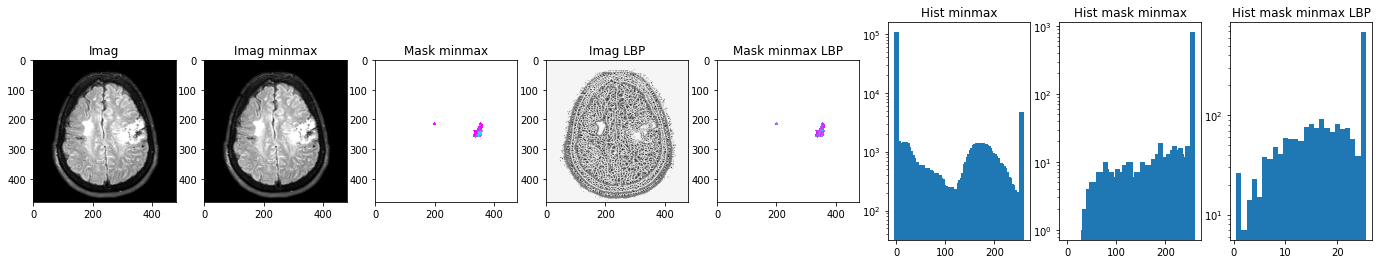

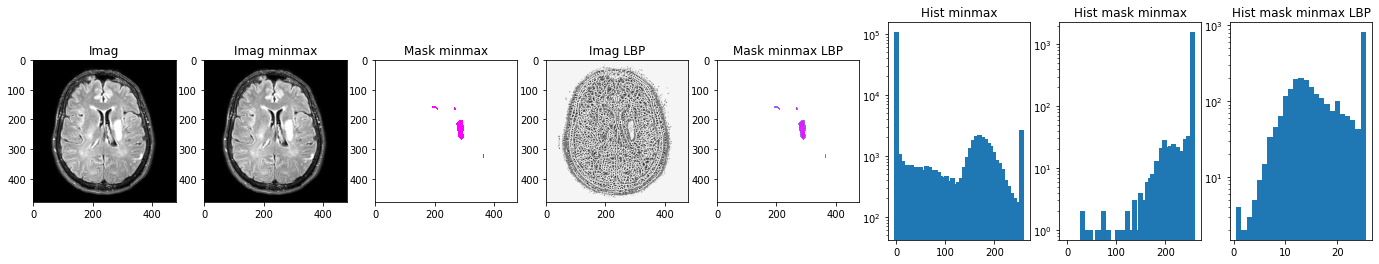

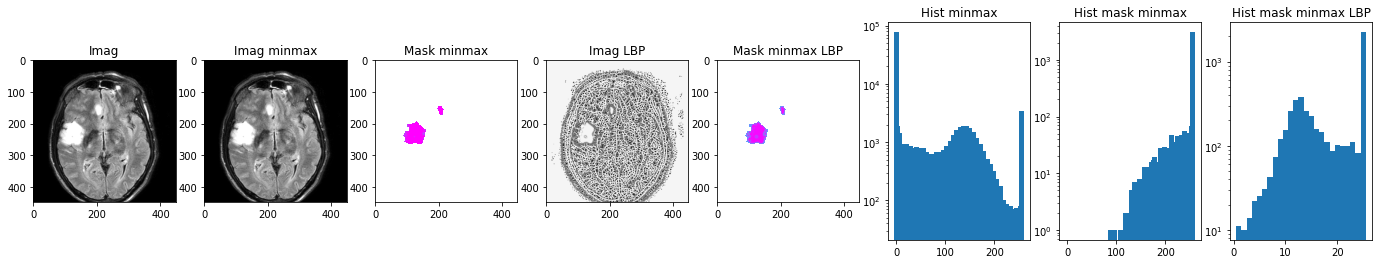

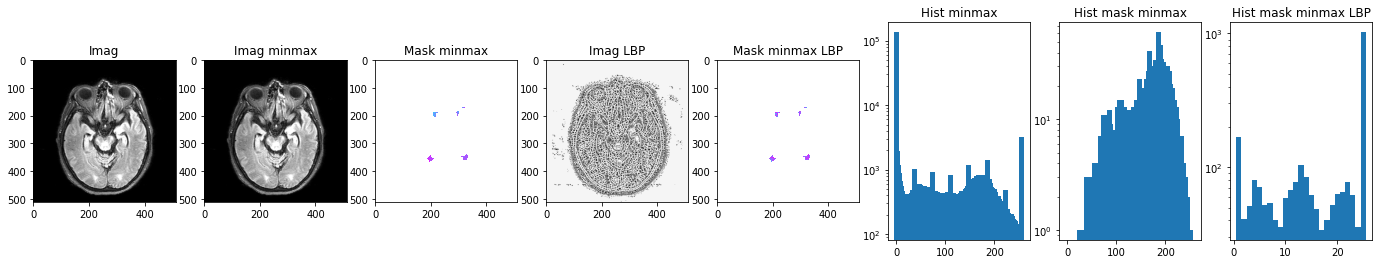

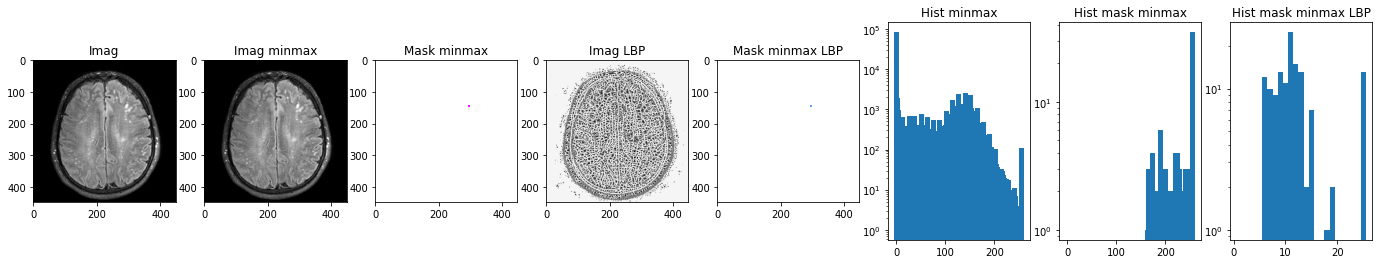

In [ ]:
df_avc = create_feature_vector(lista_avc, lista_mask_avc, figures_path1, name_of_label='AVC')
df_avc['flair'] = get_flair(lista_avc)

##EM

[21, 185, 418, 436, 615]
062_FLAIR12.bmp
076_FLAIR30.png
094_FLAIR23.png
095_FLAIR30.png
120_FLAIR21.png


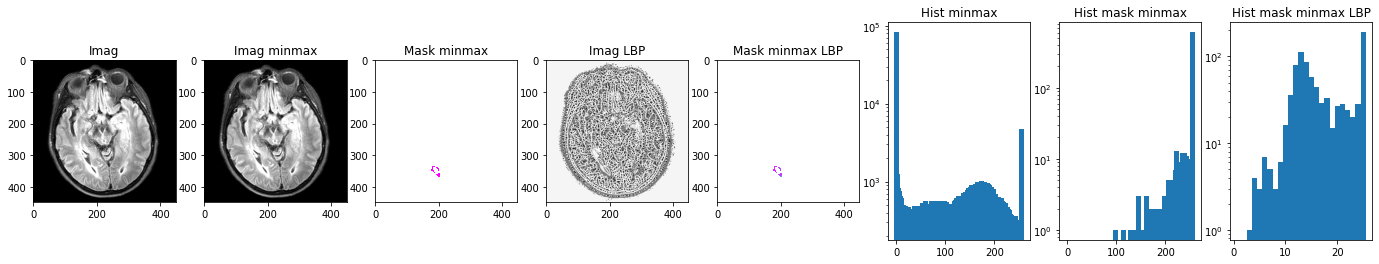

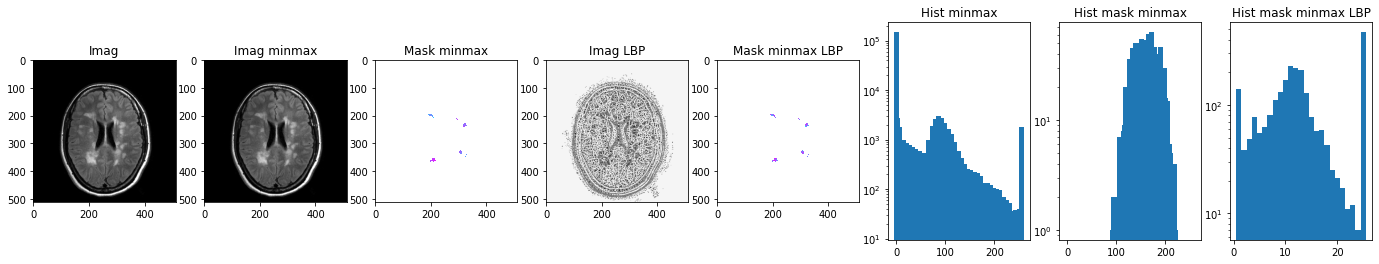

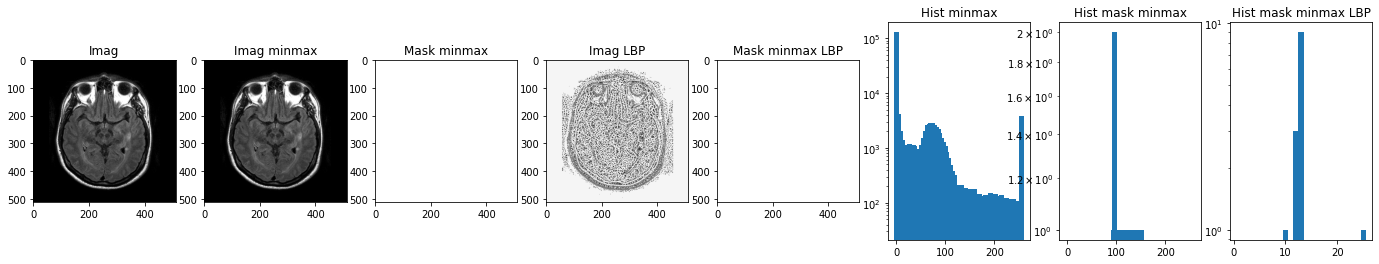

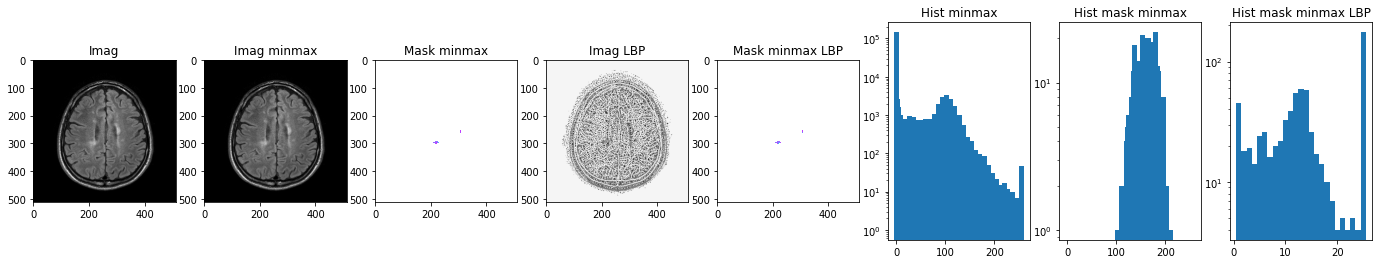

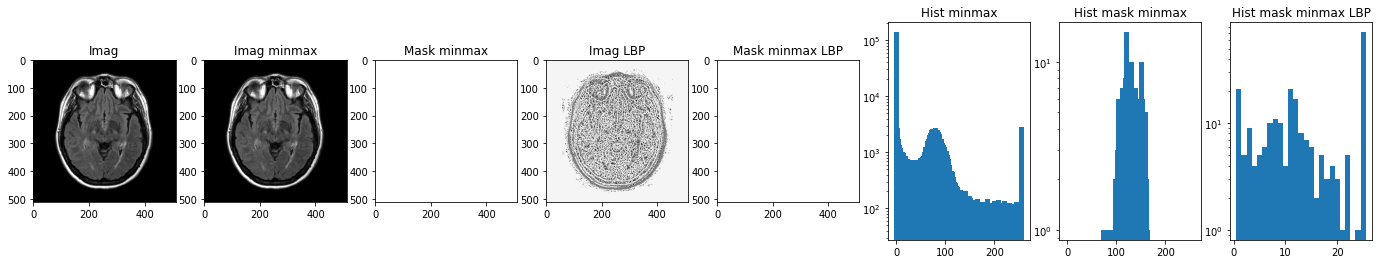

In [ ]:
df_em = create_feature_vector(lista_em, lista_mask_em, figures_path2, name_of_label='EM')
df_em['flair'] = get_flair(lista_em)

## Teste(A11)

[48, 84, 92, 156, 170]
205_FLAIR16.bmp
242_FLAIR23.bmp
251_FLAIR15.bmp
322_FLAIR31.bmp
340_FLAIR16.bmp


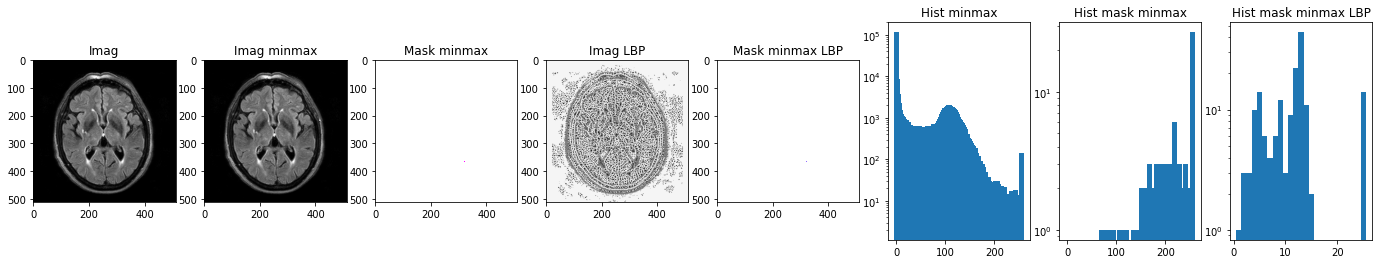

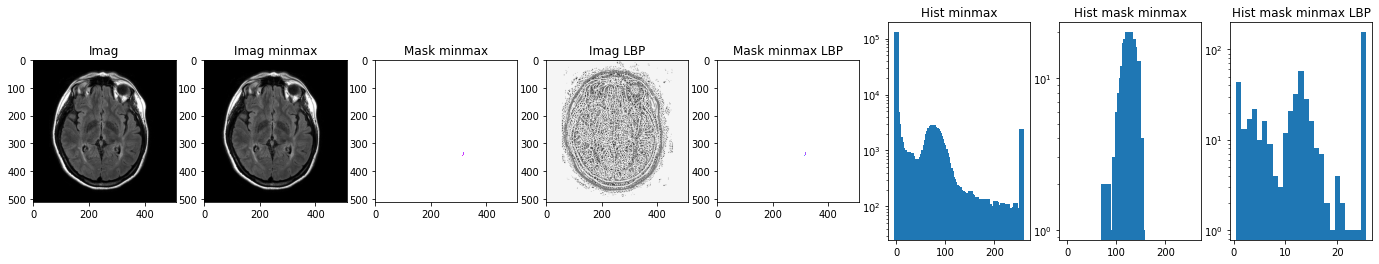

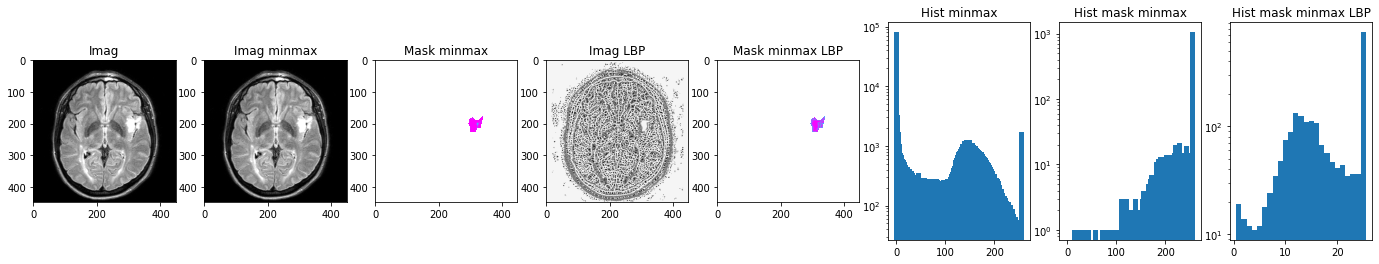

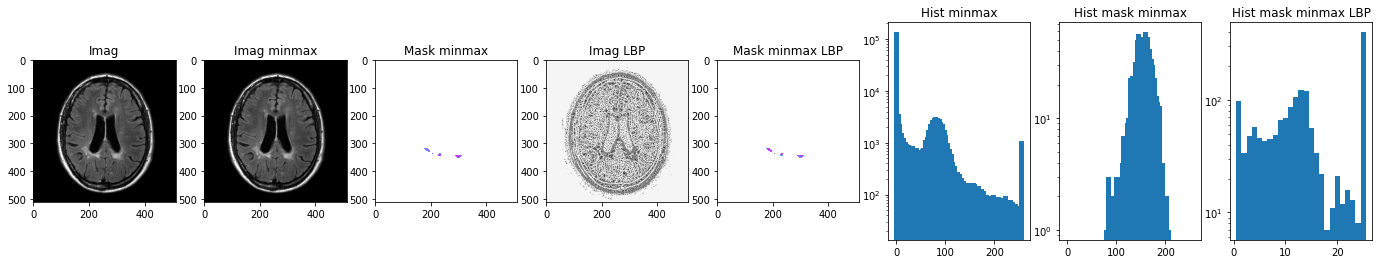

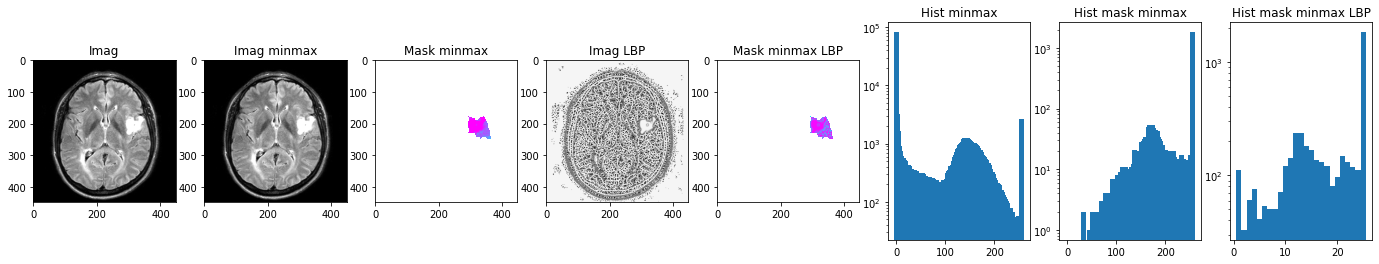

In [ ]:
df_test = create_feature_vector(lista_test, lista_mask_test, figures_path3,'TEST')
df_test['flair'] = get_flair(lista_test)

###Organizando os vetores de atributos em Data Frames

In [ ]:
df = pd.concat([df_avc, df_em])


#Metodologia

###Separando os pacientes em grupo de treino e validação
Como sugerido na proposta da A11 não dividi os dados de um mesmo paciente entre teste e validação. Porém, por conta disso, não consegui implementar os métodos de validação cruzada do sklearn. Testei o classificador para múltiplas iterações desta separação aleatória (de aproximadamente 75% treino/ 25% validação), uma a cada duas vezes a classificação foi satisfatória. Minha hipótese é que esta separação é mais propícia a agrupar os outliers.

Para classificação optei por um SVM linear com 50 iterações, imaginei que esta arquitetura seria menos propícia a overfit, mesmo que perdesse alguma acurácia.

In [ ]:
from sklearn import svm
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [ ]:

TRAIN_VALIDATION_SPLIT_PERC = 0.75
uniques = df['patient'].unique()
sep = int(len(uniques) * TRAIN_VALIDATION_SPLIT_PERC)
df = df.sample(frac=1).reset_index(drop=True)
train_ids, validation_ids = uniques[:sep], uniques[sep:]
train_df, validation_df = df[df.patient.isin(train_ids)], df[df.patient.isin(validation_ids)]

y_train = train_df['label']
X_train = train_df.drop(['label', 'patient', 'SD_1', 'Obli_1','Kurt_1','ES1_1', 'ES2_1', 'simple_mean1', 'ES1_3', 'ES2_3',], axis=1)

y_validation = validation_df['label']
X_validation = validation_df.drop(['label', 'patient', 'SD_1', 'Obli_1','Kurt_1','ES1_1', 'ES2_1', 'simple_mean1', 'ES1_3', 'ES2_3'], axis=1)





Para avaliar os resultados de validação, utilizei o 'Classification Report' e a matriz de confusão.

              precision    recall  f1-score   support

         AVC       0.94      0.99      0.97       133
          EM       0.99      0.93      0.96       113

    accuracy                           0.96       246
   macro avg       0.97      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


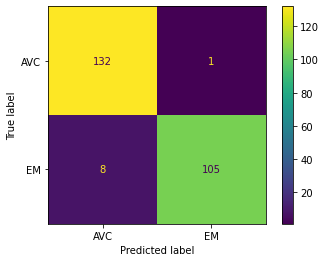

In [ ]:
clf = svm.LinearSVC(max_iter=50)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_validation)
cm = confusion_matrix(y_validation, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
cr =  classification_report(y_validation, y_pred)

print(cr)
disp.plot()
plt.show()


###Dados de teste A11

In [ ]:
df_test

,Mean_1,Mean_2,SD_2,Obli_2,Kurt_2,ES1_2,ES2_2,simple_mean2,Mean_3,SD_3,Obli_3,Kurt_3,simple_mean3,flair
0,65.535958,207.099786,55.163849,-541.741069,12540.395053,1.822259,254.0,22.007843,16.836066,6.948763,-6.210317,99.739511,224.48,16
1,38.709488,138.496528,15.949355,-48.534734,1025.839853,1.691264,130.0,1.129412,13.239583,7.769346,5.064363,114.913925,11.52,25
2,72.852692,225.216772,34.779216,-219.378437,4002.047646,1.467769,254.0,2.478431,16.712025,6.386248,-3.986285,89.554688,25.28,14
3,37.485592,140.700000,8.408924,-1.319865,165.124561,1.295349,133.0,0.156863,9.075000,7.769773,21.774763,174.680489,1.60,28
4,35.796875,133.444015,13.463799,-0.938715,542.420664,1.658756,127.0,1.015686,9.162162,6.987355,20.847468,170.109903,10.36,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,33.931103,169.069091,21.693542,-35.428147,1093.409609,1.825701,187.0,1.078431,11.181818,6.603831,11.259507,127.456347,11.00,33
221,67.710783,235.706291,31.418402,-258.476128,3926.473491,1.007593,254.0,10.160784,19.555384,6.129687,-9.644757,76.561156,103.64,17
222,52.468121,233.165217,19.887479,-31.717850,657.137524,1.392950,254.0,0.450980,12.260870,5.376417,14.753055,101.317085,4.60,23
223,36.665005,149.268519,18.895371,-25.917905,767.503304,1.792730,173.0,2.964706,11.633598,6.859658,12.269644,128.175925,30.24,34


###Avaliando a classifiação (A11)
Este classificador obteve 95% de acurácia na Atividade 11 (antes de algumas modificações que fiz aqui no P4).

In [ ]:
df_test = df_test.drop(['label','patient', 'SD_1', 'Obli_1','Kurt_1','ES1_1', 'ES2_1', 'simple_mean1', 'ES1_3', 'ES2_3'], axis=1)
y_pred_test = clf.predict(df_test)
y_pred_test

array(['AVC', 'EM', 'AVC', 'EM', 'EM', 'AVC', 'EM', 'EM', 'EM', 'AVC',
       'EM', 'EM', 'AVC', 'EM', 'EM', 'EM', 'AVC', 'EM', 'AVC', 'EM',
       'EM', 'EM', 'AVC', 'AVC', 'AVC', 'AVC', 'AVC', 'EM', 'AVC', 'AVC',
       'EM', 'EM', 'EM', 'AVC', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM',
       'AVC', 'AVC', 'EM', 'AVC', 'EM', 'AVC', 'EM', 'AVC', 'EM', 'AVC',
       'EM', 'AVC', 'EM', 'AVC', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM',
       'AVC', 'EM', 'AVC', 'EM', 'AVC', 'AVC', 'EM', 'EM', 'AVC', 'EM',
       'AVC', 'EM', 'AVC', 'AVC', 'EM', 'AVC', 'EM', 'EM', 'AVC', 'EM',
       'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'AVC',
       'EM', 'EM', 'EM', 'AVC', 'EM', 'EM', 'EM', 'EM', 'EM', 'AVC',
       'AVC', 'AVC', 'AVC', 'EM', 'EM', 'AVC', 'EM', 'EM', 'AVC', 'EM',
       'AVC', 'AVC', 'AVC', 'AVC', 'EM', 'AVC', 'EM', 'EM', 'EM', 'EM',
       'AVC', 'EM', 'AVC', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM', 'EM',
       'AVC', 'AVC', 'EM', 'AVC', 'AVC', 'EM', 'EM', 'EM'

In [ ]:
#results =  pd.DataFrame(df_test.patient)
# results['prediction'] = y_pred1
# results.to_csv('results.csv')
# files.download('results.csv')
# results

#Resultados Obtidos e Discussão


## Carregando dados e vetor de atributos de LES

In [ ]:
figures_path4 = '/content/gdrive/MyDrive/SLE/'
lista_sle, lista_mask_sle = create_files_list(figures_path4, add_zero = False)

['625_FLAIR21_mask.png', '625_FLAIR22_mask.png', '625_FLAIR23_mask.png', '625_FLAIR24_mask.png', '625_FLAIR25_mask.png', '626_FLAIR15_mask.png', '626_FLAIR16_mask.png', '626_FLAIR18_mask.png', '626_FLAIR19_mask.png', '626_FLAIR20_mask.png', '626_FLAIR21_mask.png', '626_FLAIR22_mask.png', '626_FLAIR23_mask.png', '626_FLAIR24_mask.png', '626_FLAIR25_mask.png', '626_FLAIR26_mask.png', '627_FLAIR16_mask.png', '627_FLAIR17_mask.png', '627_FLAIR18_mask.png', '627_FLAIR19_mask.png', '627_FLAIR20_mask.png', '627_FLAIR21_mask.png', '627_FLAIR22_mask.png', '627_FLAIR23_mask.png', '627_FLAIR24_mask.png', '627_FLAIR25_mask.png', '627_FLAIR26_mask.png', '627_FLAIR27_mask.png', '628_FLAIR15_mask.png', '628_FLAIR16_mask.png', '628_FLAIR21_mask.png', '628_FLAIR22_mask.png', '628_FLAIR23_mask.png', '628_FLAIR24_mask.png', '628_FLAIR25_mask.png', '628_FLAIR26_mask.png', '629_FLAIR9_mask.png', '629_FLAIR10_mask.png', '629_FLAIR12_mask.png', '629_FLAIR13_mask.png', '629_FLAIR14_mask.png', '629_FLAIR15_mas

[38, 180, 223, 231, 662]
605_FLAIR15.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


622_FLAIR24.png
627_FLAIR26.png
628_FLAIR25.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


673_FLAIR13.png


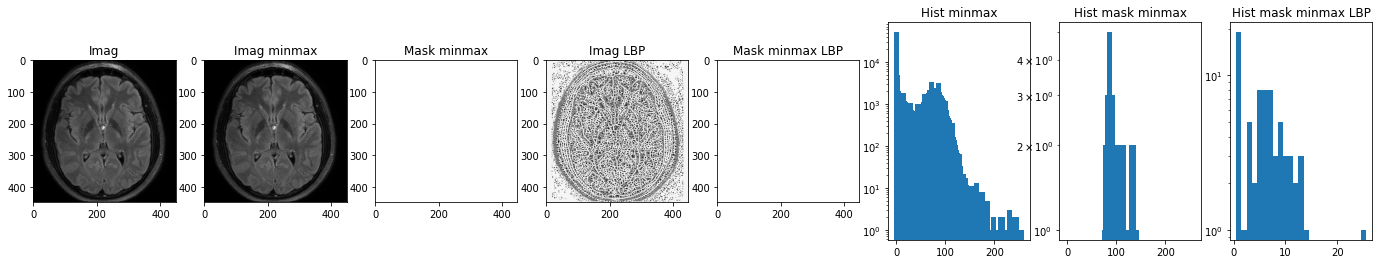

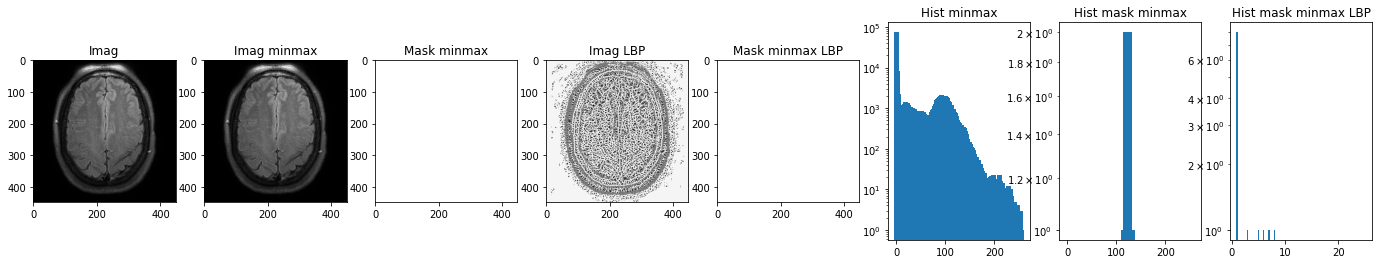

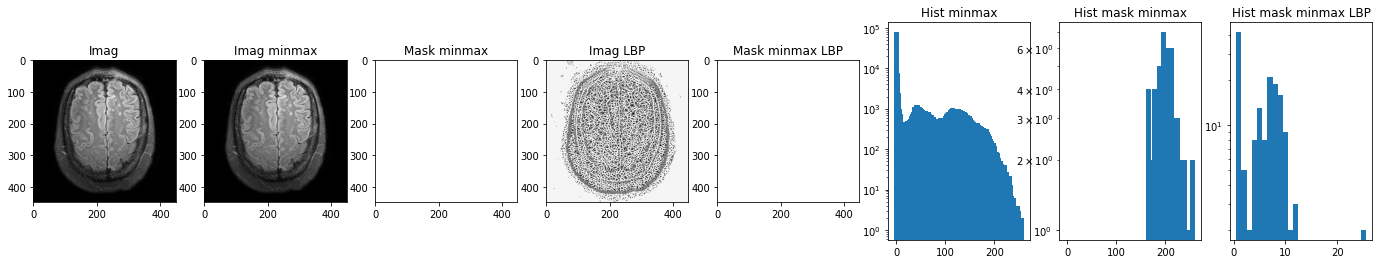

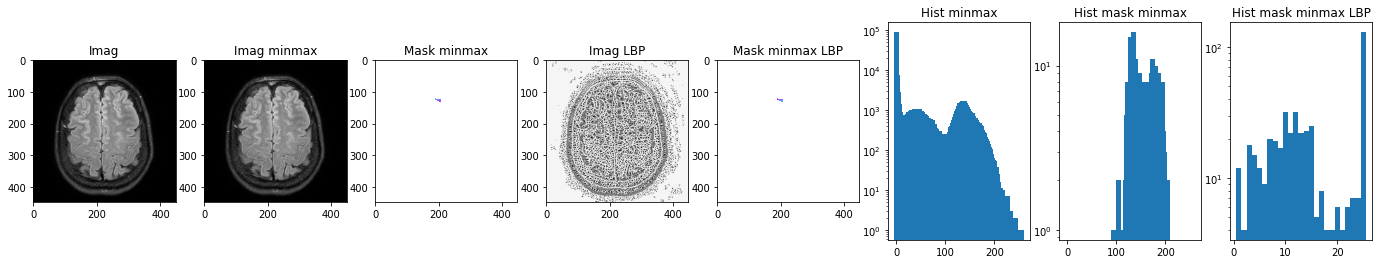

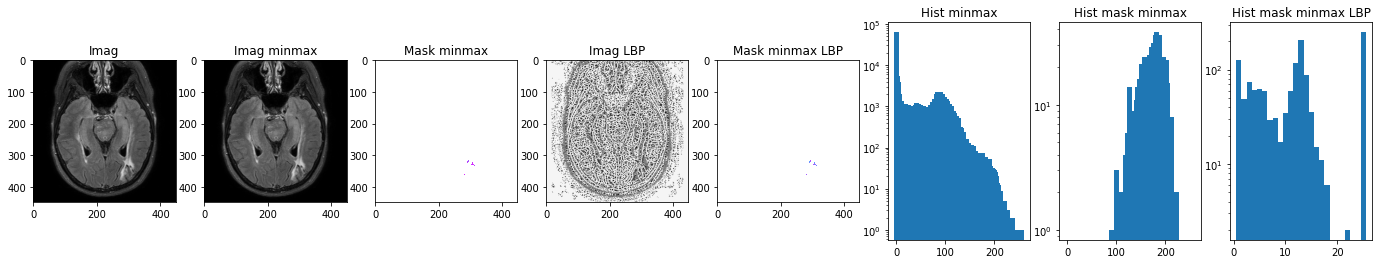

In [ ]:
df_sle= create_feature_vector(lista_sle, lista_mask_sle, figures_path4,'SLE_TEST',ones_and_zeroes = 0)

In [ ]:
df_sle['flair'] = get_flair(lista_sle)
df_sle = df_sle.dropna(axis=0)
df_sle_clean = df_sle.drop(['label', 'patient', 'SD_1', 'Obli_1','Kurt_1','ES1_1', 'ES2_1', 'simple_mean1', 'ES1_3', 'ES2_3'], axis=1)


###Predições sobre a SLE

In [ ]:
y_pred_sle = clf.predict(df_sle_clean)
y_pred_sle

results =  pd.DataFrame(df_sle.patient)
results['flair'] = df_sle['flair']
results['prediction'] = y_pred_sle

results.to_csv('results.csv')
files.download('results.csv')
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,patient,flair,prediction
0,600,11,AVC
1,600,12,AVC
2,600,13,AVC
3,600,14,EM
4,600,15,AVC
...,...,...,...
692,677,13,EM
693,677,15,EM
694,678,20,EM
695,678,21,EM


In [ ]:
df_test.to_csv('df_test.csv')
files.download('df_test.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Resultado final
O preditor apontou similaridade com EM para 504 de 694 lesões de LES (72.6%), contra 190 para AVC (27.3%).

In [ ]:
results['prediction'].value_counts()

EM     504
AVC    190
Name: prediction, dtype: int64

##Discussão

O resultado final da classificação foi satisfatório, uma vez que o tipo de lesão com a manifestação mais similar ao Lúpus Eritematoso Sistêmico é realmente a Esclerose Múltipla (ambas causam lesões desmielinizantes). Porém, imagino que a arquitetura do classificador não foi suficientemente robusta, por alguns motivos. Utilizei uma normalização rude, não implementei validação cruzada, não selecionei as features automaticamente, o kernel do SVM linear não traça hiperplanos muito complexos no espaço de características, o classificador não convergiu em 50 iterações, e também houve muita alteração do resultado de validação para diferentes divisões do grupo de treino/validação. No entanto, uma escolha dos atributos de classificação qualitativa, baseada na visualização das imagens e distribuições, pode ter compensando esses defeitos do classificador.  

###Futuro
Com mais tempo, eu teria tentado normalizações diferentes e outras propriedades de textura. Por exemplo, na A11 utilizei o GLCM mas não consegui rodar nos dados de SLE. Além disso, queria corrigir a separação treino/validação para validação cruzada, e testar outras arquiteturas do classificador. Finalmente, com outro projeto do mesmo tipo, gostaria de tentar uma rede de deep learning convolucional, com mais tempo.